## Agenda

- Tokenization
- Stemming
- Lemmatization
    - Pattern
    - TextBlob
- POS Tagging
    - Pattern
    - TextBlob
- Stop Word removal

## Tokenizer
- Wie splittet man einfach einen Satz in Wörter auf?
- https://www.admin.ch/opc/de/classified-compilation/19995395/index.html#a8

In [1]:
import nltk
from nltk.tokenize import word_tokenize

In [2]:
verfassung = '''
Im Namen Gottes des Allmächtigen!

Das Schweizervolk und die Kantone,

in der Verantwortung gegenüber der Schöpfung,

im Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,

im Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,

im Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,

gewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,

geben sich folgende Verfassung:
'''

In [3]:
#verfassung = verfassung.decode('utf-8')
verfassung

'\nIm Namen Gottes des Allmächtigen!\n\nDas Schweizervolk und die Kantone,\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:\n'

### In einzelne Wörter + Zeichen

In [5]:
tokens = nltk.word_tokenize(verfassung)
tokens[0:10]

['Im',
 'Namen',
 'Gottes',
 'des',
 'Allmächtigen',
 '!',
 'Das',
 'Schweizervolk',
 'und',
 'die']

### In Wörter

In [8]:
from nltk.tokenize import word_tokenize
words = word_tokenize(verfassung)
words=[word.lower() for word in words if word.isalpha()] #word.lower heisst dass alles klein geschrieben wird
#isalpha heisst: sinds buchstaben? wörter? oder nur zeichen (dann false)
words[0:20]

['im',
 'namen',
 'gottes',
 'des',
 'allmächtigen',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kantone',
 'in',
 'der',
 'verantwortung',
 'gegenüber',
 'der',
 'schöpfung',
 'im',
 'bestreben',
 'den',
 'bund']

### Hier noch ein paar praktische Python funktionen wie isalpha

|  s.startswith(t) | test if s starts with t |
|  ------ | ------ |
|  s.endswith(t) | test if s ends with t |
|  t in s | test if t is a substring of s |
|  s.islower() | test if s contains cased characters and all are lowercase |
|  s.isupper() | test if s contains cased characters and all are uppercase |
|  s.isalpha() | test if s is non-empty and all characters in s are alphabetic |
|  s.isalnum() | test if s is non-empty and all characters in s are alphanumeric |
|  s.isdigit() | test if s is non-empty and all characters in s are digits |
|  s.istitle() | test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) |

### In Sätze

In [9]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(verfassung)
sentences

['\nIm Namen Gottes des Allmächtigen!',
 'Das Schweizervolk und die Kantone,\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:']

## Stemming
- d.h. das überführen von Wörtern in den gleichen Stamm. 
- Übliche Probleme die Sprache so mit sich bringt:
    - Deklination: gehe, gehst, gehen, geht, ... es handelt sich um das gleiche Wort. 
    - Plural, Groß/Kleinschreibung: katze, katzen, Katze ... es handelt sich auch um das gleiche Wort. 
    - wir können also alle deklinierten Wörter auf ihren Stamm zurückbringen
    - ...

In [10]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

### Porter stemmer
- geht ganz ok für Englisch
- https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus

In [11]:
from nltk.corpus import udhr
engl_words = udhr.words("English-Latin1")
engl_words[0:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

In [12]:
[porter.stem(w) for w in engl_words][0:20]

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inher',
 'digniti',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalien',
 'right',
 'of']

Er hat das also jetzt alles auf seinen Stamm zurückgeführt. Das ist aber nicht immer sinnvoll. Es macht die Interpretierbarkeit / Objektivität fraglich, weil z.B. univers sowohl der Stamm für University, universal und Universe ist.

### Lancaster Stemmer
- kommt zu leicht anderen "stämmen"
- funktioniert nicht so gut für deutsch

In [13]:
[lancaster.stem(w) for w in engl_words][0:20]

['univers',
 'decl',
 'of',
 'hum',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inh',
 'dign',
 'and',
 'of',
 'the',
 'eq',
 'and',
 'ina',
 'right',
 'of']

In [14]:
porter.stem("lassen")

'lassen'

In [15]:
porter.stem("lasst")

'lasst'

Auch Deutsch also nicht so gut

### Snowball stemmer
- Geht gut für deusch
- http://snowball.tartarus.org/algorithms/german/stemmer.html

In [16]:
snowball = nltk.stem.snowball.GermanStemmer()

In [36]:
[snowball.stem(w) for w in words][0:20]

[u'im',
 u'nam',
 u'gott',
 u'des',
 u'allmacht',
 u'das',
 u'schweizervolk',
 u'und',
 u'die',
 u'kanton',
 u'in',
 u'der',
 u'verantwort',
 u'gegenub',
 u'der',
 u'schopfung',
 u'im',
 u'bestreb',
 u'den',
 u'bund']

## Lemmatizer
- Zurückführen des Textes zu "Wörterbuchdefinitionen". also alles auf gehen, nicht auf geh

In [18]:
text = "Women in technologies areas are amazing at coding. Especially one woman is great, her name is Ursula Burns."
words = word_tokenize(text)
words_engl =[word.lower() for word in words if word.isalpha()]

In [19]:
nltk.download('wordnet')
from nltk import WordNetLemmatizer

lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_engl]
lemmas[0:20]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


['woman',
 'in',
 'technology',
 'area',
 'are',
 'amazing',
 'at',
 'coding',
 'especially',
 'one',
 'woman',
 'is',
 'great',
 'her',
 'name',
 'is',
 'ursula',
 'burn']

### Lematizer Deutsch NLTK
- Geht leider nicht für deusch :( in nltk

In [22]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
#party_text = party_text.decode("UTF-8")
words = word_tokenize(party_text)
words_german =[word.lower() for word in words if word.isalpha()]

In [23]:
lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_german]
lemmas[0:20]

['kurz',
 'vor',
 'uhr',
 'sind',
 'polizisten',
 'der',
 'stadtpolizei',
 'in',
 'alle',
 'richtungen',
 'aber',
 'vor',
 'allem',
 'in',
 'richtung',
 'kreis',
 'ausgerückt',
 'grund',
 'war',
 'eine']

## Lemmatizer in Pattern
- Ähnlich wie NLTK funktioniert aber auch für deutsch
- https://www.clips.uantwerpen.be/pattern
- ```pip install pattern```
- Deutsche modelle kommen übrigens von der Uni Zürich https://www.zora.uzh.ch/id/eprint/28579/

In [25]:
!pip install pattern

  Created wheel for pattern: filename=Pattern-3.6-cp37-none-any.whl size=22332727 sha256=cf8b4560f6a504946d4632d27f89e1eb3cf59b6da2541805bde03b8da73d20ad
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\dc\9a\0e\5fb1a603ed4e3aa8722a88e9cf4a82da7d1b63e3d2cc34bee5
  Created wheel for feedparser: filename=feedparser-5.2.1-cp37-none-any.whl size=44944 sha256=d8b41dd287962fa0af547e05cf7eae7ac759e6d00bd077ca65ff8ee41a59e8ff
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\8c\69\b7\f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for python-docx: filename=python_docx-0.8.10-cp37-none-any.whl size=184496 sha256=f2c9e1961c8870ebb89b2d388f7fd3e513fd23ac559780074fc0c8e9a0338c30
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\18\0b\a0\1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built pattern feedparser python-docx


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
from pattern.de import parse

In [27]:
text = "Richtungen Richtung."
s = parse(text, relations=True, lemmata=True)
s

RuntimeError: generator raised StopIteration

In [28]:
lemmata = []
from pattern.de import parsetree
s = parsetree(party_text,relations=True, lemmata=True) 
for sentence in s: 
    for chunk in sentence.chunks:
        for word in chunk.words:
            #print("%s (%s)" %(word,word.lemma))
            lemmata.append(word.lemma)
lemmata[0:20]

RuntimeError: generator raised StopIteration

## Lemmatizer in Textblob
 - https://textblob.readthedocs.io/en/dev/quickstart.html
 - ```pip install -U textblob```
 - ```pip install -U textblob-de```
 - https://github.com/markuskiller/textblob-de

In [34]:
!pip install -U textblob
!pip install -U textblob-de

Requirement already up-to-date: textblob in c:\users\admin\anaconda3\lib\site-packages (0.15.3)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: textblob-de in c:\users\admin\anaconda3\lib\site-packages (0.4.3)


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
from textblob_de.lemmatizers import PatternParserLemmatizer
_lemmatizer = PatternParserLemmatizer()
_lemmatizer.lemmatize("Das ist ein hässliches Auto.")

[('das', 'DT'),
 ('sein', 'VB'),
 ('ein', 'DT'),
 ('hässlich', 'JJ'),
 ('Auto', 'NN')]

In [47]:
text = '''Himmel und Hölle
Neulich kehrte ich nach idyllischen Tagen im Emmental nach Hause zurück. Ich stieg aus dem zweitletzten Tram und atmete durch. Keine Hügel, keine Scheiterbeigen und Kuhglocken mehr. Sondern Hausberge mit Fensterlichtern, verheissungsvoll wie ein gigantischer Adventskalender und eingehüllt in das stetige Rauschen der Autobahn. Die Berner Bronx hatte mich wieder. Ein Gefühl von Heimat stieg in mir auf, ein bisschen zu kitschig um ihm gleich zu vertrauen.
Ich ging am Schulhaus vorbei, während der Wind zwischen den Flächen und Fassaden Fahrt aufnahm. Kein Mensch war zu sehen auf den Strässchen, auf denen tagsüber die Kinder spielen. Eine kleine Nachbarin hatte mit pinker und hellblauer Kreide das wohl längste Himmel-und-Hölle-Spiel auf den Gehweg gemalt, das ich je gesehen hatte. Mit seinen 121 Feldern passte es bestens zu den Hochhäusern ringsum. Kurz überlegte ich, loszulegen – Hüpfen ist himmlisch für die Seele. Doch da bog ein Security-Mann mit Schäferhund um die Ecke, und ich wollte mich nicht blamieren.
Als ich bei meinem Haus um die Ecke bog, holte mich die Realität definitiv ein. Vor dem Eingang lehnten drei fremde Männer an der Wand, die Haut in unterschiedlichen Schattierungen, wie es in meiner Nachbarschaft üblich ist. Kurz sehnte ich mich nach dem Security-Mann zurück, den ich gerade noch zur Hölle gewünscht hatte. Dann umgriff ich meinen Schlüsselbund, den Pseudo-Schlagring für alle Fälle, setzte ein Lächeln auf und wünschte einen guten Abend, als ich an den Männern vorbei ging. 
Die Herren blickten von ihren Smartphones auf, strahlten mich an und grüssten. So, wie sie es meistens tun in der Berner Bronx. Himmel und Hölle – in jenem Moment fühlte ich mich mehr daheim als je zuvor. 

Auch so eine
Die Abendsonne wärmte meinen Rücken, als ich zwischen den Hochhäusern den Helm aufsetzte und eine Runde durch die nahen Weiler drehen wollte. Da bog mein Nachbar um die Ecke und blieb stehen. "Nein, Sie sind auch so eine?”, entwischte es ihm. Ich stammelte ein paar Worte und schwang mich auf den Sattel.
Während ich der Alpenkette entgegen fuhr, brodelte der Groll in mir. Seit einiger Zeit gehöre ich zur meistgehassten Spezies auf Berns Strassen: den E-Bike-Fahrern. Glaubt man den anderen Verkehrsteilnehmern, verursachen wir jeden Unfall, sind immer zu schnell und haben unser Teufelsfahrzeug nie im Griff. Wie ein Gespenst tauchen wir hinter Fussgängern auf - mit dem einzigen Ziel, dass sie einen Herzinfarkt haben. Wir überholen andere Velofahrer und bilden uns dabei ein, ebenso sportlich zu sein wie sie, obschon wir mehr als Muskeln und Haut auf den Rippen haben und nur alibimässig in die Pedale treten. Und wir hexen uns immer dann direkt vor die Haube, wenn ein Auto in einen Kreisel einbiegen will.
Eigentlich praktisch, dachte ich, während der Wind über meine Wangen strich: Ich gehöre nicht nur zur meistgehassten Spezies, sondern auch zu jener, die alle anderen in ihrer Abneigung gegen sich vereint. Sie müssen nicht mehr übereinander lästern - es gibt ja uns.
So verflog mein Ärger auf der Höhe von Konolfingen. Ich bog in eine Route ein, die zurück in die Stadt führt, und fühlte mich spätestens in Münsingen fast ein bisschen so, als hätte ich Sport gemacht.
Zwischen den Hochhäusern kehrte mein Nachbar vom Garten zurück. “Wissen Sie”, raunte er, “ich denke eben auch schon länger darüber nach, ein E-Bike anzuschaffen. Aber sagen Sies bitte nicht weiter.” Er war etwa der zehnte, der mir dieses Geheimnis anvertraute. Aber ich sagte es ihm nicht - ich hatte ja versprochen, zu schweigen.


Tempo ist relativ
Es war einer jener Spätsommertage, an denen sich die meisten Städter noch ein letztes Mal gratis ins Freibad zwängten. Entsprechend zuversichtlich tapste ich die Treppe in meinem Lieblingshallenbad hoch und wurde nicht enttäuscht: Nur eine Bahn war von einem Verein beschlagnahmt, in einer strampelte eine Aqua-Joggerin - und in den beiden anderen schwammen lediglich je drei Leute. Natürlich, früher auf dem Land löste das Dichtestress aus - aber in der Bundesstadt grenzt es an Luxus.
Ich verstopfte die Ohren, setzte die Schwimmbrille auf und wollte gerade ins Wasser steigen, als ich stutzte: “Kreisschwimmen langsam” stand zwar vorne auf dem Springbock jener Bahn, in der ich normalerweise meine Längen ziehe. Doch die Schwimmer darin waren unglaublich zügig unterwegs. In der benachbarten Bahn hingegen, jener für “Kreisschwimmen schnell”, ging es wesentlich gemächlicher zu und her. Und während in der langsamen Bahn nur Frauen durchs Wasser flitzten, plätscherten in der Schnellen ausschliesslich Männer vor sich hin.
Ich verharrte am Beckenrand und dachte über Selbsterkenntnis, Geschlechterrollen und Klischees nach - hin und her gerissen, in welche Bahn ich nun als langsame Schwimmerin gehöre: In die langsame mit den schnellen Frauen oder in die schnelle mit den langsamen Männern. Als mich ob des Dilemmas zu frieren begann, gesellte ich mich zur Aqua-Joggerin in der Hoffnung, dass wir für die nächste halbe Stunde zu zweit bleiben und so aneinander vorbeikommen würden.
Erst nach einem halben Kilometer fiel mir ein, dass man vielleicht auch einfach Schwimm- mit Lesekursen kombinieren müsste.

***
Wursteln lassen
Der Herbst steht vor der Tür, und meine Mitbewohnerinnen werden immer aggressiver. Bislang sind wir gut aneinander vorbeigekommen – sie nutzten ihren Teil des Balkons, ich meinen. In einer geraden Flugschneise zielten sie zum Nest, das sie sich in einem Plastiksack mit Erde gebaut hatten, während ich wenige Meter daneben meinen Kaffee trank. Natürlich, wenn ich die Wäsche aufhängte, blickte mir ab und zu eine scharf ins Auge. Aber grundsätzlich verstanden wir uns gut.
Doch nun werden die Wespen jeden Tag verrückter. Irren über den Balkon und interessieren sich für meinen Kaffee. Natürlich, ich hatte es kommen sehen. Es gebe diese Mittel, sagte mein Nachbar, die spritzt man abends rein und morgens ist Ruh. Doch ich brachte es nicht übers Herz. Denn ich bin selber Schuld, dass die Mitbewohnerinnen bei mir eingezogen sind. Als die erste in den Sack kroch, dachte ich, es sei eine Hornisse, so gross war die. Ich fragte mich, ob man Hornissen töten darf – und tröstete mich mit dem Gedanken, dass sie zumindest die Wespen fernhalten würden. 
Wespen. Scheiss Viecher. Aber eigentlich haben sie mir nie etwas zuleide getan. Noch nie hat mich eine gestochen – abgesehen von dieser roten Wespe in Texas, die allen Grund dazu hatte. Ich würde mich auch wehren, wenn jemand einen Basketball von der Grösse eines Mehrfamilienhauses auf meinen Schlafplatz werfen würde. 
Und haben nicht auch Wespen ihre Daseinsberechtigung? Die Erde hat sicher auch keine Freude, dass wir da sind – und hat uns vielleicht auch einst für eine andere Spezies gehalten, als wir sind. Aber sie lässt uns wursteln und wartet zu, bis sich das Problem demnächst von selber löst.
So mache ich das jetzt auch.

***
Traumpaar
Es war sehr früh am Samstagmorgen. Alle meine Nachbarn schliefen noch. Ich schleppte mich ins Tram und setzte mich hinter ein junges Paar. Sie hatte ihren Kopf auf seine Schulter gelegt, er trommelte mit seinen Fingerspitzen auf ihren Oberarm.
Er: «Wohin fahren wir? Grauholz, oder?»
Sie: «Grauholz ist eine Autobahnraststätte.» 
Er: «Bern ist so kompliziert. Ich verlaufe mich immer. Früher musste ich dann immer Jan oder Erik anrufen.»
Sie: «Es hat doch nur eine einzige Hauptgasse.»
Er: «Aber dahinter sind so viele kleine Gassen.»
Sie: «Hm.»
Er: «Dann fahren wir bis Brünnen?»
Sie: «Bärenplatz.»
Er: «Wie lange dauert das?»
Sie: «Mrmpf.» 
Er: «Was ist?»
Sie: «Hör auf zu fragen. Es ist zu früh.»
Er: «Ich liebe diesen Zustand!»
Sie: «Echt jetzt?!»
Er: «Hier meinen sicher alle, ich sei direkt vom Ausgang heimgekehrt. Aber so einen Zustand hat man nicht einmal im Ausgang.»
Sie: «Schh… nicht so laut!»
Er: «Nein, wirklich! Ich meine, ein Sonnenaufgang ist doch viel geiler als ein Sonnenuntergang.»
Sie: «Mrmpf.»
Er: «Nun, wenn man es zu oft sieht, verliert es natürlich seinen Reiz.»
Sie: «Schhh...»
Schweigen.
Er: «Also wie lange fahren wir jetzt noch?»
Als sie in Gelächter ausbrach und ihn in die Seite knuffte, wusste ich: Dieses Paar möchte ich in vierzig Jahren wieder im Tram antreffen. Zusammen.

***

Asozial
Endlich hatte ich wieder einen meiner asozialen Tage. Einen Tag nur für mich und ohne Pläne, langweilig und wunderbar. Ich freute mich so sehr, dass ich früh aufstand um all die Wichtigkeiten anzupacken, die ich an solchen Tagen jeweils mache: Frühstücken. Am nächsten Buch schreiben, die Kaffeetasse neben mir. Mit Netflix auf dem Hometrainer strampeln. Am nächsten Buch schreiben, die Teetasse neben mir. Mal wieder was Warmes kochen. Lesen. Schlafen. 
Ich hatte mich gerade mit der Kaffeetasse eingerichtet, als das Telefon vibrierte. An meinen asozialen Tagen bin ich konsequent: Ausser einer Whatsapp-Antwort darf keiner etwas von mir erwarten. Erst recht niemand mit einer 043er-Nummer. Ich drückte das Gespräch weg und versank in meiner Welt. Später, vor Netflix, entdeckte ich eine Mail vom Chef. Ich wischte sie weg und klopfte mir innerlich auf die Schulter. 
Die Teetasse stand neben mir, als es an der Wohnungstür klingelte. Ich ignorierte es, doch nach dem zweiten Klingeln war die Neugierde stärker. Ich schlich zum Eingang und spähte aus dem Spion, erwartete diese Vertreter im Anzug, die mir einst in eben dieser Situation zuriefen: «Wir wissen, dass Sie da sind». Damals presste ich mich gegen die Tür und atmete flach, bis sie verschwunden waren. Doch nun standen dort meine Nachbarn, und sie sahen besorgt aus. Ich rang mit mir. Dann öffnete ich die Tür. 
«Sie haben da was vergessen», sagte mein Nachbar und zeigte schmunzelnd aufs Schlüsselloch. Dort steckte mein Wohnungsschlüssel, für jeden sicht- und greifbar. Von wegen konsequent asozial.


***
Vom Finden
Es war ein weinseliger Abend in der Berner Bronx. Mein Nachbar hatte schon leicht einen sitzen und stiess nochmals mit mir an. Ein bisschen machte ich mir Sorgen um ihn, denn er hatte sich erst vor zwei Wochen von seiner Freundin getrennt. Ein grosses Drama. Sie hatte bei mir geklingelt, sich mit Tränen in den Augen verabschiedet und war mit einer Reisetasche und einer kümmerlich aussehenden Wohnzimmerpflanze aus der Bronx verschwunden. Sieben Jahre waren sie zusammen gewesen.
Ich nippte am Wein und fragte vorsichtig nach dem Befinden meines Nachbarn. Er kippte das halbe Glas hinunter und schenkte sich nochmals nach. Ach, meinte er, sie sei immer noch sauer. Und er … naja … die sieben Jahre seien schön gewesen. Aber er brauche jetzt einfach mal Zeit für sich. Müsse sich selbst finden. Endlich nach Sibirien reisen, die Programmierweiterbildung machen, mit den Kumpels abhängen, lesen, wieder mehr Basketball spielen. Sich überlegen, was er eigentlich wolle im Leben. Vielleicht eine neue Stelle suchen, in eine andere Stadt ziehen, auswandern. 
In diesem Moment vibrierte sein Handy. Auf seinem Gesicht ging die Sonne auf, als er die Nachricht las. «Ich muss», sagte er und stellte das Weinglas auf den Tisch. Er habe da diese Frau kennengelernt. Sie himmle ihn an, und … naja. Er schwebte davon, und ich nahm nochmals einen Schluck. Für manche ist es halt einfacher, jemand anderes als sich selbst zu finden.

***
Ordnung muss sein / Hinten unten links
Mein Nachbar stand vor meiner Bücherwand. Sein Blick schweifte von Rowling über Gotthelf, Mann und Kafka weiter zur Krimisammlung. Jeden Moment rechnete ich mit dem üblichen «meine Güte, hast du die etwa alle gelesen?!». Ich setzte Teewasser auf, und auf meiner Zunge lag schon die Standard-Antwort zu dieser Frage: Ja, auch jene in der dritten Reihe, ausser diese hinten unten links, das ist mein Lesevorrat. Geschichten und Welten, die darauf warten, entdeckt zu werden, wenn die Zeit reif dafür ist.
Während ich nach Tassen kramte, dachte ich an meinen Besuch von neulich. Meine Lieblingsteenager waren auf eine Pizza vorbeigekommen und wollten aufräumen. Ausgerechnet meine Bücherwand. Doch meine Bibliothek ist heilig und kennt keine Logik. Mein Ordnungssystem folgt weder dem Alphabet noch Epochen. Auch Autoren sind sekundär. Wichtig ist nur, was mir die Geschichten bedeuten. Deshalb steht Friedrich Glauser neben Haruki Murakami, Jane Austen neben Anne Frank. Meine Lieblingsteenager verstehen vieles – aber das nicht. Also wählte ich das geringere Übel und opferte ihrem Ordnungssinn meine CD-Sammlung. 
«Sag mal», meinte plötzlich mein Nachbar, «da klang doch neulich Klassik aus deinem Fenster. Wo sind denn diese CDs?» Er hielt eine Beige uralter Bravo-Hits in den Händen, die im Gestell in der Pole-Position lagen, obschon ich sie seit zwanzig Jahren nicht mehr abgespielt hatte. «Die Teenies haben aufgeräumt», erklärte ich. Ohne ein weiteres Wort kämpfte er sich zum Stapel hinten unten links vor. Und tatsächlich: Dort ruhten Vivaldi, Bach und Smetana. Am Ort für Welten, die man entdeckt, wenn die Zeit reif ist. Vielleicht ist mein Ordnungssystem doch logischer, als ich gedacht hatte.

***
Lichtblicke
Das Tram zuckelte durch die Berner Bronx, und auf der Website meiner Lieblingszeitung las ich von einer Flut inxxxx, Flüchtlingsströmen, einem Massacker in Indien. Meine Laune sank mit jedem Wort. Also legte ich das Handy weg und suchte nach etwas Aufmunterndem. 
Vor mir bei der Tür sass ein Mann. Leberflecken zierten seine Glatze, hinter beiden Ohren klebte ein Hörgerät. Sein Nachbar bohrte in der Nase und steckte sich den Finger in den Mund. Beide waren nicht die Lichtblicke, die ich mir erhofft hatte. 
Also suchte ich die beiden Twens, die kürzlich zugestiegen waren. Doch sie lehnten nur stumm an der Wand und steichelten ihre Handys. Und vor dem Fenster zog grau in grau die Stadt vorbei.
Ich wollte gerade Facebook eine Chance geben, als das Tram hielt und die Tür sich öffnete. Langsam schoben sich zwei Krücken in den Wagen, zwei Arme – und danach war fertig. Die alte Frau stand vor dem Absatz und schnaufte. Die Tür piepste bereits. Und da geschah es, schneller als ich denken konnte. 
Die Hand des Glatzenmanns schnellte nach oben und drückte auf den Türöffner. Die beiden Twens sprangen aus ihrer Handywelt auf, fassten die Dame links und rechts und zogen sie hoch. Der Nasenbohrer hatte bereits seinen Platz für die Frau frei gemacht. Sie lächelte erschöpft in die Runde und sagte: «Merci».
Das Tram fuhr los. Der Mann vor mir richtete sein Hörgerät, die Twens scrollten stumm, der Nasenbohrer widmete sich seinen Fingernägeln. Und meine Welt war wieder in Ordnung.

***

Abgelöscht
Die Frau im Nachbarabteil starrte seit der letzten Haltestelle vor sich hin. Die Haare standen ihr vom Kopf, unter ihren Augen lagen dunkle Ringe, das Gesicht war bleich und glich einer Maske. Mir schien, als hätte ich sie schon mal gesehen. Dieses Piercing in der Lippe, diese Nase, diese Haartönung. Ich durchforstete mein Gehirn von Autoprüfung bis Zahnarzt. Doch nirgends machte es Click, und sie war so sehr in Gedanken versunken, dass ich Hemmungen hatte, sie anzusprechen.
Derweil plauderten ihre drei Mädchen über die Hausaufgaben und wetteiferten, welche von ihnen nun am meisten zu tun hätte. «Mami, ich hab Hunger», sagte die eine. Die Frau griff mit unverändertem Gesichtsausdruck nach ihrem Rucksack und kramte eine Tupperdose hervor. Sekunden später biss das Mädchen in einen Cracker. Und da machte es bei mir Click. 
Sie war mal das coolste Mädchen an unserer Schule. Ständig ein bisschen high, ständig umringt von Jungs, ständig locker mit den Noten. Für die weniger Coolen hatte sie einen spöttischen Blick, einen flotten Spruch und ein lautes Lachen übrig. Ich hatte sie nie leiden können. 
«Na los, aussteigen», sagte sie in diesem Moment, und in die Mädchen kam Bewegung. Sie kramte den Rucksack zusammen, warf einen Blick zurück ins Abteil. Bevor sie ausstieg, strich sie einem der Mädchen über den Kopf. Eine Art Lächeln durchbrach die erschöpften Gesichtszüge. 
Nun wusste ich, weshalb ich sie nicht gleich erkannt hatte: Sie war mir plötzlich sympathisch.
***
Wie es kommt
In der Berner Bronx teilten meine Patentochter und ich eine Lachspizza. Wir redeten über die Lehre und das Leben, und irgendwann passierte es: Ich schüttete ihr mein Herz aus. Über diese Entscheidung, die ich treffen sollte, und die mich seit einigen Nächten nicht sonderlich gut schlafen liess. Weil ich nicht wusste, welche Wahl für mich die bessere wäre. Sie hörte zu, blickte mich an mit ihren fast erwachsenen Augen und nickte verständnisvoll, als ich hilflos schlussfolgerte: «Siehst du, das hört nie auf. Auch Erwachsene quälen sich mit sowas.»
Sie neigte den Kopf zur Seite, nahm einen Schluck Pfefferminzsirup und sagte in aller Seelenruhe: «Aber es kommt doch sowieso alles genau richtig – so, wie es kommt.» Ich sah sie an, fühlte es in meinem Innern ruhig werden – und staunte, was ein Mensch alles sein kann. Das Baby an der Taufe, das meinen kleinen Finger wund kaut. Die Fünfjährige mit den blonden Zöpfen, die auf der Bühne tanzt. Das verkleckerte Kind im viel zu grossen T-Shirt, mit dem ich meinen Tisch violett anmale. Der Teenager, den ich nötige, seine Hausaufgaben zu machen. Die Reisegefährtin, die neben mir im Flugzeug nach London sitzt. Die junge Frau, die sich auf meinem Sofa einquartiert.
Und jetzt war sie das Gegenüber, das mich an meine eigene Lebensphilosophie erinnerte, als sie mir abhandengekommen war. 
Manche Geschenke sind so gross, dass man sie nie ganz erfassen kann. 

***
Kinderfragen
Es war eine gemütliche Frauenrunde in Berns schönster Gartenbeiz. Die Sonne schien zwischen dem Blätterdach hindurch, wir hatten mit gespritztem Weisswein den Feierabend eingeläutet und Apérohäppchen bestellt. Ich wollte gerade einen Schluck nehmen, als mich die Frage meiner Tischnachbarin eiskalt in den entspannten Nacken traf: «Warum hast du eigentlich keine Kinder?»
Ich unterdrückte ein Lachen und die Gegenfrage, die es darauf zu stellen gälte. Dann überlegte ich mir, ob ich eine Geschichte erfinden sollte, die meine Tischnachbarin im Erdboden versinken lassen würde. Ich dachte an einen heftigen, aber unerfüllten Kinderwunsch, an jahrzehntelange Hormonkuren und Torschlusspanik, an beziehungsunfähige Männer, an eine Fehlgeburt, einen Kindstod oder einen Krebs, der das Thema schon in Teenagertagen vom Tisch fegte. 
Sei nicht kindisch, dachte ich, und entschied mich für die Wahrheit: «Ich wollte nie welche.» Sie blickte mich an, schockierter als es bei der Kindstod-Version möglich gewesen wäre. «Jesses – weshalb?» Ich zuckte mit den Schultern. «Einfach. Ich fand die Vorstellung immer seltsam, obschon ich einen guten Draht zu Kindern habe.» Und dann stellte ich sie doch noch, die Gegenfrage: «Warum hast denn du eigentlich Kinder?» Sie verschluckte sich fast an ihrem Weisswein. «Was für eine absurde Frage!», kam als erstes und dann, ein paar Sekunden später: «Ich hab einfach immer welche gewollt.» 
***
Die Bombe
Die Bombe platzte am Freitagabend um 18.45 Uhr, als ich mit einer Jugendfreundin ein Gasthaus im Oberland betrat. Wir hatten uns im Dorf zum Abendessen verabredet und freuten uns auf etwas Währschaftes. Ich drückte die Klinke zur Gaststube runter, schritt über die Schwelle – und peng!
Augenblicklich verstummten alle Gespräche in der Stube, jede Bewegung erstarrte. Hinter dem Tresen verharrte die Servicefrau mit einem weissen Tuch und einem Bierglas in der Hand und lugte hinter dem Zapfhahn hervor. Eine der drei Damen am Fenstertisch, jene mit den lilaschimmernden Dauerwellen und dem Flamingoshirt, hatte den Oberkörper leicht zur Tür gedreht, um besser sehen zu können. Ihr Ballönchen zitterte zehn Zentimeter über der Tischplatte in ihrer Hand, der Wein wiegelte hin und her. Am Nachbartisch sassen ein paar Twens. Die Jungs legten den Kopf schief und kniffen die Lippen zusammen, während ihre Freundinnen Kaugummis malträtierten und betont gelangweilt die neuen Gäste betrachteten.
Am Stammtisch in der Ecke hielten sich derweil ein paar grauhaarige Herren in grünen Fleecewesten an ihren Stangen fest und starrten uns aus tränensackunterhangenen Augen an. Ihre Blicke wanderten von unseren bestrumpften Beinen hoch über die Taille bis zum Dekolleté und wieder zurück, um dann an der interessantesten Stelle hängen zu bleiben. Die Luft in der Gaststube flirrte, und die Augen des jüngsten Stammtischgängers quollen derart weit aus ihren Höhlen, dass ich sie schon über den Boden kullern sah. 
«Grüessech mitenang», zwitscherten meine Freundin und ich synchron, und ich wusste, dass sie in diesem Moment genau dasselbe strahlende Lächeln in die Runde schickte wie ich. Tatsächlich kehrte langsam Leben in die Gaststube zurück. Die Servicefrau trocknete das Bierglas, am Damentisch nahm die Flamingofrau einen Schluck Weisswein, die Jungs tuschelten mit ihren Freundinnen, und die Stammtischgänger kehrten zur Politik zurück. 
Wir setzten uns, bestellten und stiessen an. Auf eine Jugend im Emmental, die einen für jede Bombe in Bernbieter Gaststuben wappnet.

***
Mitternacht
Es war spät, als ich im Bergdorf die Bar verliess und Richtung Gasthaus schlenderte. Die Sterne tauchten die Bergriesen rundum in Dämmerlicht. Kein Ton war zu hören ausser dem Säuseln des Windes und meinem Atem. Ich stapfte den Hang hinauf in Richtung Waldrand, dachte an den Abend zurück und begann zu summen. 
Doch plötzlich stutzte ich. Weiter oben, ennet der Brücke, bewegte sich etwas. Eine Gestalt stand beim Halteschild einer Bushaltestelle. Als ob so spät in diesem Kaff noch ein Bus fahren würde, dachte ich. Nach ein paar weiteren Schritten fiel mir auf, dass das Wesen aussergewöhnlich klein war. Ein Kind, jetzt noch unterwegs und ganz alleine? Unmöglich, dachte ich. Dazu noch diese seltsam gedrungene Körperform. Ein Tier vielleicht? Ein Hund? Ein Wolf? Man hört ja allerhand aus den Berner Alpen.
In diesem Moment schlug die Kirchturmuhr Mitternacht. Das Wesen stand kurz still, bevor es sich wieder zu bewegen begann. Seltsam leicht und vage. Nicht von dieser Welt. 
Das Adrenalin schoss mir in die Venen. Ein Berggeist, ausgerechnet jetzt und hier. Kurz blieb ich stehen und überlegte, zurück ins Dorf zu gehen. Doch dann siegte meine Neugierde. Wenn dieses Wesen auf mich wartet, will es mir etwas mitteilen, dachte ich. Vielleicht erzählt es mir seine tragische Geschichte, dann werde ich gerne zuhören. Vielleicht fordert es Wegzoll, dann soll es ihn haben, solange es nicht gerade meine Seele ist. Vielleicht konfrontiert es mich mit meinen geheimsten Abgründen, und ich werde zu einem besseren Menschen. Und vielleicht hilft es mir, den Sinn des Lebens zu erkennen. 
Als ich bei der Haltestelle angekommen war, blieb ich vor dem Wesen stehen. Es glotzte mich an, grün und eckig, mit einem einzigen flachen Auge. An seiner Seite wehten rosa Plastiksäckchen. 
Es war ein Robidog. 

***
Die Schrulle
Ich hatte es für eine brillante Idee gehalten. Ab ins Hallenbad im Nachbardorf, wenn alle Stadtberner und jene von ringsum sich in die Freibäder drängen und das einzig offene Hallenbad am anderen Ende der Stadt ist.
Doch nun stand ich hinter dem Drehkreuz und ahnte Böses: Die Schuhecke war übersät von Kinderschuhen. Vielleicht ein Schwimmkurs, gleich vorbei, versuchte ich mich zu trösten. Und dass bestimmt eine Bahn für Schwimmer abgesteckt sein würde. Doch als ich die Badi betrat, schwand jede Hoffnung. 
Ein Lärm wie von einem gigantischen Vogelschwarm durchdrang die Halle. Die Kinder waren überall. Auf den Böcken, den Rändern, den Absperrseilen, in jeder mit Wasser versehenen Ecke und in allen anderen auch. Dazwischen ragten vereinzelte Köpfe von älteren Schwimmern aus dem Wasser, die sich vor dem Teekränzchen ihren Weg durch die Menge paddelten.
Doch so rasch gab ich nicht auf. Ich stieg ins Wasser. Die Kids würden schon zur Seite gehen, wenn jemand ein bisschen schneller angezischt käme. Doch ich hatte mich getäuscht. Sie plantschten seelenruhig weiter, flitzten vor meine Nase, kickten mich in die Seite, streiften meine Füsse, sprangen über mich hinweg und tauchten unter mir durch. Als mich ein Arm am Kopf traf, hielt ich an und schickte einen bösen Blick durch meine Schwimmbrille. Zwei grosse braune Mädchenaugen starrten zurück – und in diesem Moment hatte ich ein Flashback.
Ich war zehn, und es gab nichts schöneres, als mit meiner besten Freundin in der Badi abzuhängen. Wir hockten am liebsten auf den Absperrseilen und sammelten die Ringe vom Boden, drei, vier, fünf auf einen Streich. Ab und zu linsten wir zu den Jungs hinüber um zu schauen, ob einer schaute. 
Und dann war da immer so eine Schrulle. Eine Frau mit Schwimmbrille und Schwimmkappe, die ständig motzte und seltsamerweise zum Schwimmen in die Badi gekommen war. Sie hatte mich immer sehr genervt.
Ich liess den bösen Blick verschwinden und machte, dass ich aus dem Wasser kam.

***
Rosen, Mensch!
Wir waren beim Gin angelangt, als meine Begleitung auf die Toilette musste. Ich blickte mich um, betrachtete die Kunstwerke an den Wänden des Restaurants und liess mich vom Klangteppich der Stimmen ringsum einlullen. 
«Und sonst – wie läufts?», kristallisierte sich eine Stimme heraus. Sie gehörte einer Frau am Nachbartisch, Ende dreissig, schwarzes Haar, blaues Kleid. Sie drehte ein Glas Rotwein in der perfekt manikürten Hand und lächelte ihr Gegenüber vielsagend an. Dieses war in ihrem Alter, eine zierliche Blondine mit rotem Lippenstift und schwarzem Top. 
Sie lachte und schüttelte den Kopf. «Ich benehm mich wie ein verdammter Teenager.»
«Sag bloss, du hast ihn immer noch nicht gefragt, ob ihr was trinken geht!»
«Ich kann ihm kaum in die Augen schauen. Und dann ist wieder alles easy.»
Die Schwarzhaarige starrte die Blondine an. 
«Was denn! Ich will nicht aufdringlich sein.»
«Der Mann hat dir Rosen geschenkt.»
«Das war nur ein Dankeschön.»
«Rosen!»
«Keine roten.»
«Rosen, Mensch!»
«Ich will nichts überinterpretieren.»
«Versprich mir, dass du ihn morgen fragst.»
«Vergiss es.»
«Was ist denn schon dabei?»
«Nichts. Aber ich will nicht immer die Initiative ergreifen müssen.»
«Männer ergreifen nie die Initiative.»
Die Blondine seufzte und leerte ihren Campari. «Lass uns zahlen, ich hab morgen früh diesen Vortrag vor der japanischen Delegation.»
«Ich dachte, morgen führst du Mitarbeitergespräche.»
«Erst nachmittags.»
«Shit. Frag ihn. Bitte.»
In diesem Moment kam meine Begleitung von der Toilette zurück, setzte sich hin und lächelte mir vielsagend zu. «Und sonst, wie läufts?»
***
Liebe auf den 1000. Blick
Ich weiss, ich habs spät begriffen, mir manchmal den Mund über dich zerrissen. Wenn du diese Zeilen liest, wirst du dir ins Fäustchen lachen. Und doch, es muss gesagt sein: Mich hats erwischt, und zwar so richtig. 
Jahrelang habe ich dich ignoriert. Verzeih mir. Ich kann mich nicht einmal an den Moment erinnern, in dem du in mein Leben tratst, oder besser: ich in deins. Du warst einfach plötzlich da, irgendwo an der Peripherie meines Horizonts. Und so existierten wir nebeneinander her, eigentlich so gut wie Nachbarn, aber doch Welten voneinander entfernt.
Die ersten bewussten Begegnungen mit dir liessen mich die Nase rümpfen. Kaum war ich drei Minuten bei dir, war ich mit Drogen konfrontiert, wurde angemacht oder angelallt. Wenn ich ein paar Stunden blieb und all das Kaputte ignorierte, wars zwar meistens ganz lustig. Du bist – zugegeben – ein bisschen sexy mit deinem verruchten Charme, und es sind spannende Leute, die dir ihr Herz verschrieben haben. Doch wenn deine Fans von dir zu schwärmen begannen, als wärst du der Nabel der Welt, war mir das suspekt. Denn das, pardon, bist du definitiv nicht.
Aber nun ists geschehen. Da war dieses Weekend, und sie schleppten mich zu dir. Niemand pöbelte mich schon am Bahnhof an. Stattdessen war da dieser Zauberer, der uns zu starkem Kaffee spontan seine Tricks demonstrierte. Da war dieser wunderschöne Garten in einer alten Villa. Rosen rankten Wände hoch, Quellwasser gurgelte zwischen hüfthohen Farnen und die Betten knarrten. Da war dieser majestätische Baum in der Altstadt, an dem ich mich nicht sattsehen konnte. Das Gemisch zweier Sprachen, das mich in den Traum begleitete. Und die Schifffahrt auf dem See. 
Ja, liebes Biel, ich weiss nun, was die Leute in dir sehen. Auch ich habe mich ein bisschen in dich verknallt. Meine grosse Liebe würde ich für dich zwar nicht verlassen. Aber ich komme garantiert zurück für den nächsten Flirt.







Nackte Tatsachen
Ich stand vor der Tür meiner Nachbarn, den Finger über dem Klingelknopf. Eigentlich wollte ich nur rasch mitteilen, dass die Waschküche früher frei wird. Dennoch hatte ich Hemmungen. Ich dachte an das heisse Wetter und berechnete Blickwinkel. Und all das wegen eines gemütlichen Abends wenige Wochen zuvor.
Wir sassen mit Freunden beim Znacht, als sich herausstellte, dass das nette Paar am Tisch gegenüber ebenfalls in der Bronx wohnt. Sofort gerieten wir ins Schwärmen. Über die Rasenflächen, die Kreidezeichnungen und die Einkaufswagen, mit denen etliche Bewohner ihre Lebensmittel direkt in die Wohnungen kutschieren. «In welcher Nummer wohnst du denn?», fragte einer der beiden Herren. Denn in der Bronx gibt es zwar viele und hohe Häuser, aber nur einen Strassennamen. 
Als ich ihm die Nummer nannte, erstarrte er und schielte zu seinem Partner. 
«Was ist?», fragte dieser. 
«Könnte das nicht…?» Der Satz hing ein paar Sekunden in der Luft, bevor sein Freund losprustete. «Ach was, die ist doch viel älter!»
Natürlich bohrte ich nach. 
Satz um Satz zog ich meinen Nachbarn aus der Nase, dass sie im breiten Stufenblock neben uns wohnen. Mit bester Aussicht auf unsere Balkone. Und dass dies in ihrem ganzen Haus für Gesprächsstoff sorgt. Weil dort bei schönem Wetter immer eine Frau Yogaübungen und Stretching macht. Splitterfasernackt. 
Und nun stand ich da, mit dem Wäschekorb unter dem Arm und dem Finger über der Klingel. Überlegte, auf welche Seite des Hauses der Balkon dieser Wohnung führte. Sinnierte, wo ich meine Nachbarin herklingeln würde und wie viele nackte Tatsachen ich mir zumuten möchte. Zog die langsam wieder zurück. Und tröstete mich damit, dass meine Nachbarin vielleicht nicht so dringend saubere Kleider benötigt.


Provinz
Sie hatten uns tatsächlich rausgeworfen – noch vor Mitternacht. Wir standen auf der Strasse, sechs Gestalten, ebenso angeheitert wie verloren. In den Häusergassen herrschte Stille. 
«Provinz», maulte der Kollege mit dem gestreiften Hemd. 
«Wir sind in der Stadt! Wir finden was!», erwiderte die Kollegin mit dem hippen Hut und stiefelte los. «Es gibt immer ein Dead End!»
«Dead End?», fragte die Kollegin mit der schicken Brille, während wir durch die Nachbarschaft streiften.
«So eine Spelunke, die bis morgens offen hat. Na? Du bist die einzige, die sich hier auskennt», antwortete der Kollege mit dem Buddha-Lächeln. 
«Ich weiss noch! Dort vorne waren wir mal in einer Bar!», rief die Kollegin mit dem schicken Hut und verschwand um die Ecke. 
Als wir vor der Bar standen, schüttelte der Kollege mit den Lackschuhen den Kopf. Sie war diese bereits zu.
«Ich sags ja: Provinz. Nicht mal ein Dead End», nörgelte der Kollege mit dem gestreiften Hemd fünf Versuche später. 
«Was willst du – es ist Montag», wehrte sich die Kollegin mit der schicken Brille.
«Dort vorne hat noch was auf», rief der Kollege mit dem Buddha-Lächeln. 
«Das ist ein Puff», warf ich ein. 
«Hmmm…», meinte der Kollege im gestreiften Hemd. 
«Oh Mann, Frauen! Jetzt wollen die ins Puff! Was ist, kommt ihr mit? Allein mag ich nicht! So könnten wir zumindest zu dritt was trinken», frotzelte die Kollegin mit dem schicken Hut. 
«He, ich will nur ein Bier!», wehrte sich der Kollege mit dem Buddha-Lächeln.
Der Kollege mit den Lackschuhen grinste.
«Das dort sieht eher so nach Puff-Bar aus», fand die Kollegin mit der schicken Brille. 
 «Also los», sagte der Kollege mit dem gestreiften Hemd. Die Herren eilten los, und wir folgten.
 «Echt», fand die Kollegin mit dem schicken Hut. «Ich hätte mehr erwartet von der Länggasse.»
«Falsche Stadt, Dear», erwiderte ich und hielt die Tür auf. 
Sie grinste. «Ah ja. Langstrasse.»

***
Teamwork
Der Kinderwagen war von den Rädern bis unter den Korb mit Taschen vollgestopft. Papa parkierte ihn im Nachbarabteil des Zugs. Der Knirps reklamierte. Mama holte ihn aus dem Wagen. Mit kugelrunden Augen sass er auf ihrem Schoss. «Ja gell, jetzt fährst du schon wieder Zug», zwitscherte Mama. 
Derweil fläzte sich Papa in den Sitz vor mir und begann in einem Magazin zu lesen. Er schlug die Beine übereinander, während der Knirps versuchte, auf dem Sitz aufzustehen. «Nein, nicht mit den Schuhen auf die Bänke», mahnte Mama. Irgendwann zog sie ihm die Schuhe aus. Papa blätterte. 
Als der Sitz zu langweilig wurde, turnte der Knirps auf Mama. Eine Weile spielte sie Klettergerüst, dann holte sie Klötzchen aus einer der Kinderwagentaschen. Er schlug damit gegeneinander, während sich Papa den Finger leckte, um die nächste Seite zu wenden. Ein Klötzchen fiel zu Boden, ein zweites, drittes, viertes. Mama sammelte sie auf. Papa las. 
In diesem Moment wurde ich sauer. Welches Jahr schreiben wir eigentlich, maulte eine Stimme in mir. 1920? Der Mann liest, während die Frau sich um das quengelnde Kind kümmert? 
Derweil versuchte der Kleine wieder, an Mamas Bauch entlang hinaufzuspazieren. Sie seufzte, als sie ihn hochhievte, damit er besser über die Sitzlehne blicken konnte. 

«Jetzt reichts», sagte Mama plötzlich. «Wir müssen wechseln.»
Fünf Sekunden später schlug Papa das Magazin zu und schnappte sich den Knirps. Mama holte ein Buch hervor und begann zu lesen. 
Eine Weile sass der Kleine staunend neben Papa. Dann begann er zu quengeln. Jetzt kommts, dachte ich. Gleich reicht er ihn wieder der Mama rüber, weil es mühsam wird. 
Doch Papa hievte den Kleinen hoch, damit er über die Sitzlehne blicken konnte. Der Knirps beobachtete, Papa strich ihm über den Rücken, und Mama blätterte in ihrem Buch. Den ganzen Rest der Fahrt. 
Wir schreiben 2020 – zum Glück. 
***
Buuduf
Wir standen in Oberburg vor der Ampel. Meine Sitznachbarin klopfte aufs Steuerrad. 
«Es reicht schon», beruhigte ich.
«Aber sobald ich «Grüezi» sag, hab ich schon verloren.»
«Wieso?»
«Ich oute mich sofort als Zürcherin.»
«Die meisten Schweizer sagen «grüezi».»
Sie rückte ein paar Autolängen vor.
«Aber ihr schreibt sogar «grüessech» bei den Kassen. Immer habt ihr so eigene Wörter! Wie sagst du eigentlich «Burgdorf»?»
«Burdlef.»
«Budlef?»
«Burdlef. So sagen die Burdlefer selbst. Das hab ich mir angewöhnt, als ich beim Burdlefer Tagblatt arbeitete. Aber als Kind im hintersten Chrachen hab ich immer Burtuf gesagt.»
«Bugduf?»
«Burtuf.»
«Buuduf.»
«Burtuf! Vielleicht bleibst du besser bei Burdlef.»
Wir rückten wieder ein Stück vor. 
«Also Burdlef. Und wie sagst du «Oberburg»?»
«Oberburg.»
«Öu. Hats nicht noch was lustigeres hier?»
«Vielleicht das Chrouchtu.»
«Chchrouchthu?»
Sie gab Gas, wir passierten die Kreuzung.
«Das war jetzt aber motiviert!»
«Und wie schreibt sich der Ort?»
«Krauchthal.»
«Das klingt nicht nach Bern. Eher nach «Herr der Ringe». Wie Bruchsal.»
«Heisst das nicht Bruchtal?»
«Doch. Aber Bruchsal gibt’s tatsächlich, in der Nähe von Karlsruhe.»
Wir fuhren am Spital vorbei.
«Also Bugdlef.»
«Sag einfach Burgdorf, bitte.»

***
'''

In [48]:
from textblob_de.lemmatizers import PatternParserLemmatizer
_lemmatizer = PatternParserLemmatizer()
_lemmatizer.lemmatize(text)

[('Himmel', 'NN'),
 ('und', 'CC'),
 ('Hölle', 'NN'),
 ('Neulich', 'JJ'),
 ('kehrte', 'NN'),
 ('ich', 'PRP'),
 ('nach', 'IN'),
 ('idyllisch', 'JJ'),
 ('Tagen', 'NN'),
 ('im', 'IN'),
 ('Emmental', 'NN'),
 ('nach', 'IN'),
 ('Hause', 'NN'),
 ('zurück', 'RP'),
 ('Ich', 'PRP'),
 ('steigen', 'VB'),
 ('aus', 'IN'),
 ('dem', 'DT'),
 ('zweitletzten', 'NN'),
 ('Tram', 'NN'),
 ('und', 'CC'),
 ('atmete', 'NN'),
 ('durch', 'RP'),
 ('Kein', 'JJ'),
 ('Hügel', 'NN'),
 ('kein', 'JJ'),
 ('Scheiterbeigen', 'NN'),
 ('und', 'CC'),
 ('Kuhglocken', 'NN'),
 ('mehr', 'RP'),
 ('Sondern', 'JJ'),
 ('Hausberge', 'NN'),
 ('mit', 'IN'),
 ('Fensterlichtern', 'NN'),
 ('verheissungsvoll', 'NN'),
 ('wie', 'IN'),
 ('ein', 'DT'),
 ('gigantischer', 'NN'),
 ('Adventskalender', 'NN'),
 ('und', 'CC'),
 ('eingehüllt', 'NN'),
 ('in', 'IN'),
 ('das', 'DT'),
 ('stetig', 'JJ'),
 ('Rauschen', 'NN'),
 ('der', 'DT'),
 ('Autobahn', 'NN'),
 ('Die', 'DT'),
 ('Bern', 'JJ'),
 ('Bronx', 'NN'),
 ('haben', 'VB'),
 ('mich', 'PRP'),
 ('wieder',

## POS Tagging (Part of Speech Tagging)
- Ich bin nur interessiert an Substantiven oder Adjektiven oder Verben. 
- Wie kann ich nur diese filtern? 
- Funktioniert für Deutsch nicht auf Anhieb in NLTK :(
- aber gut in pattern und textblob

## Übersicht
https://www.clips.uantwerpen.be/pages/mbsp-tags

|  Tag | Description | Example |
|  ------ | ------ | ------ |
|  **CC** | conjunction, coordinating | and, or, but |
|  **CD** | cardinal number | five, three, 13% |
|  **DT** | determiner | the, a, these |
|  **EX** | existential there | there were six boys |
|  **FW** | foreign word | mais |
|  **IN** | conjunction, subordinating or preposition | of, on, before, unless |
|  **JJ** | adjective | nice, easy |
|  **JJR** | adjective, comparative | nicer, easier |
|  **JJS** | adjective, superlative | nicest, easiest |
|  **LS** | list item marker |  |
|  **MD** | verb, modal auxillary | may, should |
|  **NN** | noun, singular or mass | tiger, chair, laughter |
|  **NNS** | noun, plural | tigers, chairs, insects |
|  **NNP** | noun, proper singular | Germany, God, Alice |
|  **NNPS** | noun, proper plural | we met two Christmases ago |
|  **PDT** | predeterminer | both his children |
|  **POS** | possessive ending | s |
|  **PRP** | pronoun, personal | me, you, it |
|  **PRP** | pronoun, possessive | my, your, our |
|  **RB** | adverb | extremely, loudly, hard |
|  **RBR** | adverb, comparative | better |
|  **RBS** | adverb, superlative | best |
|  **RP** | adverb, particle | about, off, up |
|  **SYM** | symbol | % |
|  **TO** | infinitival to | what to do? |
|  **UH** | interjection | oh, oops, gosh |
|  **VB** | verb, base form | think |
|  **VBZ** | verb, 3rd person singular present | she thinks |
|  **VBP** | verb, non-3rd person singular present | I think |
|  **VBD** | verb, past tense | they thought |
|  **VBN** | verb, past participle | a sunken ship |
|  **VBG** | verb, gerund or present participle | thinking is fun |
|  **WDT** | wh-determiner | which, whatever, whichever |
|  **WP** | wh-pronoun, personal | what, who, whom |
|  **WP** | wh-pronoun, possessive | whose, whosever |
|  **WRB** | wh-adverb | where, when |
|  **.** | punctuation mark, sentence closer | .;?* |
|  **,** | punctuation mark, comma | , |
|  **:** | punctuation mark, colon | : |
|  **(** | contextual separator, left paren | ( |
|  **)** | contextual separator, right paren | ) |

### POS Tags in pattern

In [58]:
verben = []
substantive = []
adjektive = []
from pattern.de import parsetree
s = parsetree(party_text,relations=True, lemmata=True) 
for sentence in s: 
    for chunk in sentence.chunks:
        for word in chunk.words:
            if "V" in word.type:
                verben.append(word)
            if "NN" in word.type:
                substantive.append(word)
            if "J" in word.type:
                adjektive.append(word)

In [59]:
verben

[Word(u'sind/VB'), Word(u'war/VB'), Word(u'geraten/VBN'), Word(u'sei/VB')]

In [60]:
substantive

[Word(u'Uhr/NN'),
 Word(u'Polizisten/NNS'),
 Word(u'Stadtpolizei/NN'),
 Word(u'Richtungen/NN'),
 Word(u'Richtung/NN'),
 Word(u'Kreis/NN'),
 Word(u'ausger\xfcckt/NN'),
 Word(u'Meldung/NN'),
 Word(u'Party/NN'),
 Word(u'Aargauerstrasse/NNP'),
 Word(u'Kontrolle/NN')]

In [146]:
adjektive

[Word(u'Kurz/JJ'),
 Word(u'alle/JJ'),
 Word(u'privaten/JJ'),
 Word(u'angeblich/JJ')]

### POS tags in textblob

In [39]:
substantive = []
adjektive = []
verben = []
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags:
    if "NN" in word[1]:
        substantive.append(word[0])
    if "V" in word[1]:
        verben.append(word[0])
    if "JJ" in word[1]:
        adjektive.append(word[0])

In [42]:
blob.tags

[('Kurz', 'JJ'),
 ('vor', 'IN'),
 ('22.00', 'CD'),
 ('Uhr', 'NN'),
 ('sind', 'VB'),
 ('Polizisten', 'NNS'),
 ('der', 'DT'),
 ('Stadtpolizei', 'NN'),
 ('in', 'IN'),
 ('alle', 'JJ'),
 ('Richtungen', 'NN'),
 ('aber', 'RB'),
 ('vor', 'IN'),
 ('allem', 'DT'),
 ('in', 'IN'),
 ('Richtung', 'NN'),
 ('Kreis', 'NN'),
 ('9', 'CD'),
 ('ausgerückt', 'NN'),
 ('Grund', 'NN'),
 ('war', 'VB'),
 ('eine', 'DT'),
 ('Meldung', 'NN'),
 ('zu', 'IN'),
 ('einer', 'DT'),
 ('privaten', 'JJ'),
 ('Party', 'NN'),
 ('an', 'IN'),
 ('der', 'DT'),
 ('Aargauerstrasse', 'NNP'),
 ('die', 'WDT'),
 ('angeblich', 'JJ'),
 ('ausser', 'IN'),
 ('Kontrolle', 'NN'),
 ('geraten', 'VBN'),
 ('sei', 'VB')]

In [43]:
substantive #NER sind Eigenworte, also Namen. Wie etwa Aargauerstrasse. NNP hat er Aargauerstrasse genannt.

['Uhr',
 'Polizisten',
 'Stadtpolizei',
 'Richtungen',
 'Richtung',
 'Kreis',
 'ausgerückt',
 'Grund',
 'Meldung',
 'Party',
 'Aargauerstrasse',
 'Kontrolle']

In [44]:
adjektive

['Kurz', 'alle', 'privaten', 'angeblich']

In [45]:
verben

['sind', 'war', 'geraten', 'sei']

In [49]:
substantive = []
adjektive = []
verben = []
blob = TextBlobDE(text, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags:
    if "NN" in word[1]:
        substantive.append(word[0])
    if "V" in word[1]:
        verben.append(word[0])
    if "JJ" in word[1]:
        adjektive.append(word[0])

In [53]:
len(substantive)

1768

In [58]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [59]:
FreqDist(substantive)

FreqDist({'»': 120, '«': 115, '–': 19, '***': 16, 'Moment': 10, 'Tür': 9, 'Frau': 9, 'Kollege': 9, 'Kopf': 8, 'Papa': 8, ...})

In [54]:
len(verben)

613

In [60]:
FreqDist(verben)

FreqDist({'war': 38, 'ist': 25, 'hatte': 24, 'sind': 12, 'sagte': 10, 'dachte': 9, 'haben': 8, 'meine': 8, 'stand': 8, 'hat': 8, ...})

In [55]:
len(adjektive)

459

In [62]:
FreqDist(adjektive)

FreqDist({'meiner': 9, 'ich': 8, 'Berner': 6, 'sie': 6, '«': 6, 'eigentlich': 6, 'hoch': 5, 'plötzlich': 5, 'keine': 4, 'es': 4, ...})

## Stop word removal


In [63]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Englisch

In [64]:
stopwords.words('english')[0:100]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [65]:
words_engl = ["the", "big", "tree", "and", "the", "duck"]
filtered_words = [word for word in words_engl if word not in stopwords.words('english')]
filtered_words

['big', 'tree', 'duck']

### Deutsch

In [66]:
mylist = stopwords.words('german')

In [69]:
my_new_list = list(set(mylist)- set(["ich"])) #so kann ich verhindern, dass das "ich" rausgenommen wird
my_new_list

['würden',
 'jenes',
 'alles',
 'um',
 'würde',
 'derselben',
 'sie',
 'musste',
 'dort',
 'wirst',
 'seiner',
 'jedes',
 'kann',
 'einigen',
 'gegen',
 'uns',
 'zur',
 'unsere',
 'jeden',
 'deinem',
 'solche',
 'ihn',
 'seine',
 'das',
 'weiter',
 'indem',
 'dem',
 'selbst',
 'welchem',
 'dies',
 'so',
 'deines',
 'einer',
 'zum',
 'anderer',
 'weil',
 'solcher',
 'dieser',
 'jede',
 'jenem',
 'wollte',
 'zu',
 'einig',
 'diesem',
 'euer',
 'sehr',
 'sollte',
 'ihrem',
 'meinem',
 'deine',
 'euren',
 'soll',
 'hier',
 'kein',
 'manchen',
 'ihre',
 'hin',
 'den',
 'jenen',
 'sind',
 'was',
 'auch',
 'damit',
 'allen',
 'im',
 'unseres',
 'manche',
 'von',
 'dir',
 'dieselbe',
 'noch',
 'andere',
 'anderm',
 'einmal',
 'ihrer',
 'euch',
 'könnte',
 'meiner',
 'über',
 'warst',
 'dazu',
 'eures',
 'hat',
 'dieses',
 'während',
 'in',
 'will',
 'vor',
 'waren',
 'anderr',
 'welcher',
 'keiner',
 'seinen',
 'hatten',
 'solchen',
 'jener',
 'können',
 'bis',
 'derselbe',
 'einiger',
 'für',

In [70]:
words_german = ["ich", "war", "im", "wald", "spazieren"]
filtered_words = [word for word in words_german if word not in stopwords.words('german')]
filtered_words

['wald', 'spazieren']

## Wordle 2.0

- Tokenization
- Lemmatization

In [72]:
text = (" ").join(udhr.words("German_Deutsch-Latin1"))
# tokenize and lemmatize
words = word_tokenize(text) #umwandeln
words_german =[word.lower() for word in words if word.isalpha()] #allen grümpel raus nehmen
lemma = nltk.WordNetLemmatizer() #dann noch lemmatisieren
lemmas = [lemma.lemmatize(i) for i in words_german]
clean_blob = lemmas
clean_blob

['die',
 'allgemeine',
 'erklärung',
 'der',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'vom',
 'präambel',
 'da',
 'die',
 'anerkennung',
 'der',
 'angeborenen',
 'würde',
 'und',
 'der',
 'gleichen',
 'und',
 'unveräußerlichen',
 'rechte',
 'aller',
 'mitglieder',
 'der',
 'gemeinschaft',
 'der',
 'menschen',
 'die',
 'grundlage',
 'von',
 'freiheit',
 'gerechtigkeit',
 'und',
 'frieden',
 'in',
 'der',
 'welt',
 'bildet',
 'da',
 'die',
 'nichtanerkennung',
 'und',
 'verachtung',
 'der',
 'menschenrechte',
 'zu',
 'akten',
 'der',
 'barbarei',
 'geführt',
 'haben',
 'die',
 'da',
 'gewissen',
 'der',
 'menschheit',
 'mit',
 'empörung',
 'erfüllen',
 'und',
 'da',
 'verkündet',
 'worden',
 'ist',
 'daß',
 'einer',
 'welt',
 'in',
 'der',
 'die',
 'menschen',
 'rede',
 'und',
 'glaubensfreiheit',
 'und',
 'freiheit',
 'von',
 'furcht',
 'und',
 'not',
 'genießen',
 'da',
 'höchste',
 'streben',
 'de',
 'menschen',
 'gilt',
 'da',
 'e',
 'notwendig',
 'ist',
 'die',
 'menschenrec

- Numbers etc.. removal
- Stop word removal

In [75]:
from nltk.corpus import stopwords
words_alpha =[word.lower() for word in clean_blob if word.isalpha()]
stopwords = stopwords.words('german')
stopwords.append("jede")
#stopwords.append("a")
# stopworts.append("iii"); so kann ich auch den anderen gerümpelt rausknallen
result = [word for word in words_alpha if word not in stopwords]
result[0:20]

['allgemeine',
 'erklärung',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'präambel',
 'anerkennung',
 'angeborenen',
 'gleichen',
 'unveräußerlichen',
 'rechte',
 'mitglieder',
 'gemeinschaft',
 'menschen',
 'grundlage',
 'freiheit',
 'gerechtigkeit',
 'frieden',
 'welt']

In [76]:
result[0:20]

['allgemeine',
 'erklärung',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'präambel',
 'anerkennung',
 'angeborenen',
 'gleichen',
 'unveräußerlichen',
 'rechte',
 'mitglieder',
 'gemeinschaft',
 'menschen',
 'grundlage',
 'freiheit',
 'gerechtigkeit',
 'frieden',
 'welt']

In [80]:
text = (" ").join(result)

In [81]:
 a = [123,
     123]

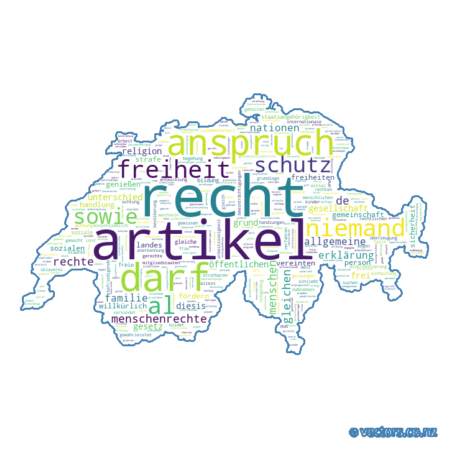

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue',collocations=False, normalize_plurals=False)
wc.generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()